In [327]:
import pandas as pd
import numpy as np
import sklearn as sk

In [328]:
df1 = pd.read_csv("politifact_with_bio_data_cleaned.csv")

In [329]:
df1.columns

Index(['Unnamed: 0', 'index', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'name',
       'claim_date', 'claim_source', 'claim', 'issue', 'accuracy_rating',
       'fact_checker', 'fact_check_ruling_date', 'url', 'page_num',
       'id.bioguide', 'id.wikipedia', 'bio.gender', 'bio.birthday', 'type',
       'party', 'start', 'end', 'state', 'full_name', 'accuracy'],
      dtype='object')

In [330]:
df1.head()

,Unnamed: 0,index,Unnamed: 0.1,Unnamed: 0.1.1,name,claim_date,claim_source,claim,issue,accuracy_rating,...,id.wikipedia,bio.gender,bio.birthday,type,party,start,end,state,full_name,accuracy
0,0,0,0,2,Mark Kelly,"August 5, 2022",an ad,Blake Masters “wants to pass a national ban on...,abortion,mostly-true,...,Mark Kelly,M,1964-02-21,sen,Democrat,2020-12-02,2023-01-03,AZ,Mark Kelly,1
1,1,1,1,12698,Mark Kelly,"October 4, 2015",an interview on State of the Union,"""We sell 40 percent of our guns without a back...",guns,half-true,...,Mark Kelly,M,1964-02-21,sen,Democrat,2020-12-02,2023-01-03,AZ,Mark Kelly,0
2,2,2,2,12811,Mark Kelly,"August 12, 2013",an opinion column on NJcom,"""Polls show that 96 percent of New Jerseyans –...",guns,true,...,Mark Kelly,M,1964-02-21,sen,Democrat,2020-12-02,2023-01-03,AZ,Mark Kelly,1
3,3,3,3,12844,Mark Kelly,"March 31, 2013",an interview on Fox News Sunday,"Says ""94 percent of (Marco Rubio's) constituen...",guns,true,...,Mark Kelly,M,1964-02-21,sen,Democrat,2020-12-02,2023-01-03,AZ,Mark Kelly,1
4,4,4,4,14007,Mark Kelly,"October 6, 2020",a debate,Says Martha McSally “voted to take away money ...,immigration,half-true,...,Mark Kelly,M,1964-02-21,sen,Democrat,2020-12-02,2023-01-03,AZ,Mark Kelly,0


##### Drop rows of the same claim but categorised under different issues to avoid data leakage when splitting

In [331]:
print("there are: {rows}".format(rows=df1.shape))
print("but only {n} unique claims".format(n=df1['claim'].unique().__len__()))

there are: (7645, 25)
but only 4884 unique claims


Upon inspection this is the result of politcas grouping the same article under different issues. The duplicates need to be removed to avoid data leakage.

In [332]:
df2 = df1.drop_duplicates(subset=['claim'], keep='first')

In [333]:
claims = df2['claim']
issues = []
for c in claims:
    issues.append(' '.join(df1[df1['claim']==c]['issue'].unique()))

In [334]:
df2['issues'] = issues

C:\Users\Loh Dai Jiu\AppData\Local\Temp\ipykernel_27452\3057121005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['issues'] = issues


In [335]:
df1 = df2
df1.reset_index(inplace=True)

In [336]:
df1['issues']

0                   abortion
1                       guns
2                       guns
3                       guns
4       immigration military
                ...         
4879          transportation
4880          transportation
4881                veterans
4882                 workers
4883                 workers
Name: issues, Length: 4884, dtype: object

In [337]:
df1.shape

(4884, 27)

In [338]:
def clean_date(x):
    arr = x.split(" ")
    clean = ""
    arr[2] = arr[2][:4]
    for i in arr:
        for char in i:
            clean += char
        clean += " "
    return clean[:-1]

In [339]:
df1['claim_date'] = df1['claim_date'].apply(lambda x: clean_date(x))
df1['claim_date']

0          August 5, 2022
1         October 4, 2015
2         August 12, 2013
3          March 31, 2013
4         October 6, 2020
              ...        
4879         May 17, 2011
4880    November 19, 2008
4881    December 13, 2010
4882     January 23, 2011
4883       March 24, 2009
Name: claim_date, Length: 4884, dtype: object

In [340]:
# https://towardsdatascience.com/clean-a-messy-date-column-with-mixed-formats-in-pandas-1a88808edbf7

# standardise the format of all date columnns: YYYY-MM-DD
df1['claim_date_formatted'] = pd.to_datetime(df1['claim_date'],infer_datetime_format=True)
df1['birthdate_formatted'] = pd.to_datetime(df1['bio.birthday'],dayfirst=True)
df1['start_formatted'] = pd.to_datetime(df1['start'],dayfirst=True)
df1['end_formatted'] = pd.to_datetime(df1['end'],dayfirst=True)

df1[['claim_date', 'claim_date_formatted', 'bio.birthday', 'birthdate_formatted', 'start', 'start_formatted',
    'end', 'end_formatted']].sample(5) # standardised date format: YYYY-MM-DD

,claim_date,claim_date_formatted,bio.birthday,birthdate_formatted,start,start_formatted,end,end_formatted
2364,"January 25, 2011",2011-01-25,1961-08-04,1961-08-04,2005-01-04,2005-01-04,2008-11-16,2008-11-16
3504,"April 14, 2013",2013-04-14,1952-09-22,1952-09-22,1993-01-05,1993-01-05,1995-01-03,1995-01-03
3317,"February 12, 2015",2015-02-12,1947-05-27,1947-05-27,1987-01-06,1987-01-06,1989-01-03,1989-01-03
4167,"August 31, 2008",2008-08-31,1943-12-11,1943-12-11,1985-01-03,1985-01-03,1991-01-03,1991-01-03
685,"April 19, 2021",2021-04-19,1946-06-14,1946-06-14,2017-01-20,2017-01-20,2021-01-20,2021-01-20


## Feature Engineering for Date Features

Year data is omitted because model must be used to predict future data.

In [341]:
df1['claim_date_month'] = df1['claim_date_formatted'].dt.month
df1['claim_date_week'] = df1['claim_date_formatted'].dt.isocalendar().week
df1['claim_date_day'] = df1['claim_date_formatted'].dt.day
df1['claim_date_dayofweek'] = df1['claim_date_formatted'].dt.dayofweek

df1['fact_check_ruling_date'] = pd.to_datetime(df1['fact_check_ruling_date'],infer_datetime_format=True)
df1['fact_check_ruling_month'] = df1['fact_check_ruling_date'].dt.month
df1['fact_check_ruling_week'] = df1['fact_check_ruling_date'].dt.isocalendar().week
df1['fact_check_ruling_day'] = df1['fact_check_ruling_date'].dt.day
df1['fact_check_ruling_dayofweek'] = df1['fact_check_ruling_date'].dt.dayofweek

In [342]:
def getAgeWhenClaimWasMade(birthdate, claimdate):
    birth_year = birthdate.strftime('%Y-%m-%d').split('-')[0]
    claim_year = claimdate.strftime('%Y-%m-%d').split('-')[0]
    curr_age = int(claim_year) - int(birth_year)
    return curr_age
df1['claimer_age'] = df1.apply(lambda x: getAgeWhenClaimWasMade(x['birthdate_formatted'], x['claim_date_formatted']), axis=1)
df1[['birthdate_formatted', 'claim_date_formatted', 'claimer_age']].sample(10)

,birthdate_formatted,claim_date_formatted,claimer_age
2308,1961-08-04,2014-12-21,53
3957,1963-06-06,2009-07-08,46
1924,1954-12-15,2010-12-06,56
2319,1961-08-04,2008-09-16,47
2854,1936-08-29,2008-10-07,72
3994,1972-02-29,2022-08-12,50
4579,1971-06-10,2016-03-06,45
2506,1966-09-27,2014-06-30,48
3750,1969-07-23,2014-01-20,45
3262,1942-02-20,2010-02-17,68


In [343]:
np.sort(df1['claimer_age'].unique())

array([ 25,  26,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  92,  94, 106,
       107, 108, 115, 123, 137, 138, 141, 146, 148, 150, 151, 157, 158,
       161, 172, 173, 174, 176, 193, 195, 196, 204, 210, 217, 218, 220,
       221, 223, 224, 227, 230, 234, 235, 239, 245, 247, 248, 251, 266,
       267, 271], dtype=int64)

<div class="alert alert-warning">
- Notice abnormally old ages!

In [344]:
abnormal_age_idx = df1[df1['claimer_age'] > 100].index
abnormal_age_names = df1.iloc[abnormal_age_idx].groupby('name').size().index
df1.iloc[abnormal_age_idx].drop_duplicates(subset='name')

,level_0,Unnamed: 0,index,Unnamed: 0.1,Unnamed: 0.1.1,name,claim_date,claim_source,claim,issue,...,end_formatted,claim_date_month,claim_date_week,claim_date_day,claim_date_dayofweek,fact_check_ruling_month,fact_check_ruling_week,fact_check_ruling_day,fact_check_ruling_dayofweek,claimer_age
2828,4424,4424,4424,4424,424,John Carter,"March 21, 2010",a press release,“The bill also provides full federal funding f...,abortion,...,1823-03-03,3,11,21,6,3,12,28,6,218
3114,4839,4839,4839,4839,519,Richard Clarke,"April 26, 2015",a panel on ABC This Week,"Said President Barack Obama ""said he was going...",afghanistan,...,1891-03-03,4,17,26,6,4,18,28,1,172
3597,5716,5716,5716,5716,909,Mark Harris,"September 20, 2018",A campaign ad,Says Democratic North Carolina House candidate...,bipartisanship,...,1823-03-03,9,38,20,3,10,40,2,1,239
3679,5842,5842,5842,5842,1011,David Barton,"June 12, 2010",an open letter,"Says state Rep. Jim Keffer, a GOP lieutenant t...",bipartisanship,...,1825-03-03,6,23,12,5,7,27,5,0,227
3795,6008,6008,6008,6008,1180,James White,"January 27, 2020",a tweet,"Says ""10% of U.S. children are Texans.""",children,...,1795-03-03,1,5,27,0,1,5,31,4,271
3870,6132,6132,6132,6132,1245,James Peterson,"June 23, 2017",a ruling from the bench,"""Ted Kaczynski has less restrictive confinemen...",children,...,1935-01-03,6,25,23,4,8,33,18,4,123
3875,6142,6142,6142,6142,1273,James Woods,"July 31, 2016",a tweet,"Says Hillary Clinton wrote, ""I believe the pri...",children,...,1919-03-03,7,30,31,6,8,31,1,0,148
3899,6188,6188,6188,6188,1397,Charles Cooper,"March 26, 2013",arguments before the US Supreme Court,"""Very few men outlive their own fertility.""",children,...,1895-03-03,3,13,26,1,3,13,28,3,157
3939,6256,6256,6256,6256,1548,John Delaney,"August 27, 2019",an interview,"The Amazon rainforest fires are ""directly rela...",china,...,1919-03-03,8,35,27,1,9,36,6,4,141
4196,6645,6645,6645,6645,2254,John Stockton,"January 23, 2022",an interview,“There’s 150 I believe now – it’s over 100 pro...,coronavirus,...,1867-03-03,1,3,23,6,1,4,26,2,196


In [345]:
# check thru politicians with dates that don't make sense
# https://bioguide.congress.gov/
abnormal_age_idx = df1[df1['claimer_age'] > 100].index
abnormal_age_names = df1.iloc[abnormal_age_idx].groupby('name').size().index
df1.iloc[abnormal_age_idx].drop_duplicates(subset='name')[['name','claimer_age', 'claim_source',
                                                           'birthdate_formatted',
                                                          'start_formatted', 'end_formatted','claim_date_formatted']] # 20 names to manually check thru and correct the dates

,name,claimer_age,claim_source,birthdate_formatted,start_formatted,end_formatted,claim_date_formatted
2828,John Carter,218,a press release,1792-09-10,1821-12-03,1823-03-03,2010-03-21
3114,Richard Clarke,172,a panel on ABC This Week,1843-02-09,1889-12-02,1891-03-03,2015-04-26
3597,Mark Harris,239,A campaign ad,1779-01-27,1821-12-03,1823-03-03,2018-09-20
3679,David Barton,227,an open letter,1783-12-14,1821-12-03,1825-03-03,2010-06-12
3795,James White,271,a tweet,1749-06-16,1793-12-02,1795-03-03,2020-01-27
3870,James Peterson,123,a ruling from the bench,1894-02-11,1933-03-09,1935-01-03,2017-06-23
3875,James Woods,148,a tweet,1868-02-04,1917-04-02,1919-03-03,2016-07-31
3899,Charles Cooper,157,arguments before the US Supreme Court,1856-01-16,1893-08-07,1895-03-03,2013-03-26
3939,John Delaney,141,an interview,1878-08-21,1917-04-02,1919-03-03,2019-08-27
4196,John Stockton,196,an interview,1826-08-02,1865-12-04,1867-03-03,2022-01-23


In [346]:
print(f'There are {len(abnormal_age_names)} unique invalid politicians.\n')
print(f'They are found on {len(abnormal_age_idx)} rows which are to be dropped.')

There are 34 unique invalid politicians.

They are found on 74 rows which are to be dropped.


Upon inspection and googling we learn that this was due to a mismatch when joining the two tables(bio data and Politifact).

In [347]:
# drop rows with these politicians who have alr passed on by index - abnormal_age_idx
df1.drop(abnormal_age_idx, inplace=True)
# reset df2 index
df1.reset_index(drop=True)

,level_0,Unnamed: 0,index,Unnamed: 0.1,Unnamed: 0.1.1,name,claim_date,claim_source,claim,issue,...,end_formatted,claim_date_month,claim_date_week,claim_date_day,claim_date_dayofweek,fact_check_ruling_month,fact_check_ruling_week,fact_check_ruling_day,fact_check_ruling_dayofweek,claimer_age
0,0,0,0,0,2,Mark Kelly,"August 5, 2022",an ad,Blake Masters “wants to pass a national ban on...,abortion,...,2023-01-03,8,31,5,4,8,34,26,4,58
1,1,1,1,1,12698,Mark Kelly,"October 4, 2015",an interview on State of the Union,"""We sell 40 percent of our guns without a back...",guns,...,2023-01-03,10,40,4,6,10,40,4,6,51
2,2,2,2,2,12811,Mark Kelly,"August 12, 2013",an opinion column on NJcom,"""Polls show that 96 percent of New Jerseyans –...",guns,...,2023-01-03,8,33,12,0,8,33,18,6,49
3,3,3,3,3,12844,Mark Kelly,"March 31, 2013",an interview on Fox News Sunday,"Says ""94 percent of (Marco Rubio's) constituen...",guns,...,2023-01-03,3,13,31,6,4,14,2,1,49
4,4,4,4,4,14007,Mark Kelly,"October 6, 2020",a debate,Says Martha McSally “voted to take away money ...,immigration,...,2023-01-03,10,41,6,1,10,42,14,2,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4805,7639,7639,7639,7639,24290,Sam Graves,"August 29, 2019",a newsletter,"""The average bridge in Missouri is 48 years ol...",transportation,...,2003-01-03,8,35,29,3,10,40,2,2,56
4806,7641,7641,7641,7641,24663,Spencer Bachus,"November 19, 2008",missing_value,"""Even with recent changes, the average hourly ...",transportation,...,1995-01-03,11,47,19,2,1,3,13,1,61
4807,7642,7642,7642,7642,25045,Steve Kagen,"December 13, 2010",a newspaper article,"""Already, the mayor of Green Bay is having rib...",veterans,...,2009-01-03,12,50,13,0,12,50,16,3,61
4808,7643,7643,7643,7643,26167,Blake Farenthold,"January 23, 2011",an oped,"""Despite claims that you can 'keep the health ...",workers,...,2013-01-03,1,3,23,6,2,5,2,2,50


## Train Test Split

<div class="alert alert-warning">
    
- To split the data into train and test datasets prior to applying countvectorizer / tfidfvectorizer/ other feature engineering steps to prevent data leakage.
    
    Reference:
- https://stackoverflow.com/questions/54491953/can-i-use-countvectorizer-on-both-test-and-train-data-at-the-same-time-or-do-i-n
- https://stackoverflow.com/questions/49444262/normalize-data-before-or-after-split-of-training-and-testing-data

In [348]:
from sklearn.model_selection import train_test_split

# Set "accuracy" as the y variable
y = df1["accuracy"] 

# Set everything other than accuracy as the X variables
X = df1.drop(columns=["accuracy"]) 

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.30, random_state=42)

### CountVectorizer `claim`

In [349]:
# https://stackoverflow.com/questions/52972368/select-top-n-tfidf-features-for-a-given-document

train_claim = X_train['claim']
test_claim = X_test['claim']

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_claim_vec = TfidfVectorizer(lowercase=False, stop_words="english")
tfidf_claim_vec.fit(train_claim)
tfidf_claim_vec_train = tfidf_claim_vec.transform(train_claim).toarray()
tfidf_claim_vec_test = tfidf_claim_vec.transform(test_claim).toarray()

tfidf_claim_vec_train.shape,tfidf_claim_vec_test.shape

((3367, 6907), (1443, 6907))

### Subjectivity of `claim`

You should consider upgrading via the 'c:\Users\Loh Dai Jiu\New folder\python.exe -m pip install --upgrade pip' command.


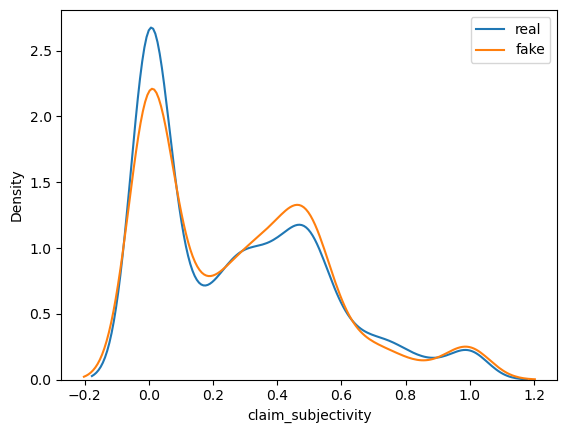

In [350]:
!pip install textblob 
from textblob import TextBlob
X_train['claim_subjectivity'] = X_train['claim'].apply(lambda x:TextBlob(x).sentiment.subjectivity)
X_test['claim_subjectivity']  = X_test['claim'].apply(lambda x:TextBlob(x).sentiment.subjectivity)
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(x="claim_subjectivity", data=X_train[y_train==0])
sns.kdeplot(x="claim_subjectivity", data=X_train[y_train==1])
plt.legend(['real','fake'])
plt.show()

### CountVectorizer `claim source`

In [351]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_src = CountVectorizer(stop_words='english', lowercase=True)
vectorizer_src.fit(X_train['claim_source'].values)
src_vec_train = vectorizer_src.transform(X_train['claim_source']) # fit & transform on train

# only transform on test
src_vec_test = vectorizer_src.transform(X_test['claim_source'].values)

src_vec_train.shape

(3367, 960)

### CountVectorizer `Issues`

In [352]:
vectorizer_issues = CountVectorizer()
vectorizer_issues.fit(X_train['issues'].values)
issues_vec_train = vectorizer_issues.transform(X_train['issues']) # fit & transform on train
issues_vec_test = vectorizer_issues.transform(X_test['issues'].values)
issues_vec_train.shape

(3367, 85)

### One-Hot Encoding (OHE) for Categorical Features

- apply on categorical features: ['issue', 'state', 'bio.gender', 'type', 'party']

#### OHE all categorical variables together

In [353]:
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import classification_report, confusion_matrix

In [354]:
categorical_variables = ['state', 'bio.gender', 'type', 'party']

X_train_categorical = X_train[categorical_variables]
X_test_categorical = X_test[categorical_variables]

# One-hot encoding
enc_lr = OneHotEncoder(handle_unknown="ignore")

transformer_lr = make_column_transformer((enc_lr, categorical_variables), remainder="passthrough")
X_train_categorical = transformer_lr.fit_transform(X_train_categorical)
X_test_categorical = transformer_lr.transform(X_test_categorical)

age_train = X_train['claimer_age'].values.reshape(-1,1)
age_test = X_test['claimer_age'].values.reshape(-1,1)
claim_date_data_train = X_train[['claim_date_month', 'claim_date_week', 'claim_date_day', 'claim_date_dayofweek']].values.reshape(-1,4)
claim_date_data_test = X_test[['claim_date_month', 'claim_date_week', 'claim_date_day', 'claim_date_dayofweek']].values.reshape(-1,4)
fact_check_date_data_train = X_train[['fact_check_ruling_month', 'fact_check_ruling_week', 'fact_check_ruling_day', 'fact_check_ruling_dayofweek']].values.reshape(-1,4)
fact_check_date_data_test = X_test[['fact_check_ruling_month', 'fact_check_ruling_week', 'fact_check_ruling_day', 'fact_check_ruling_dayofweek']].values.reshape(-1,4)
subjectivity_train = X_train['claim_subjectivity'].values.reshape(-1,1)
subjectivity_test = X_test['claim_subjectivity'].values.reshape(-1,1)

X_train_vec = np.hstack([age_train, claim_date_data_train, fact_check_date_data_train, subjectivity_train, src_vec_train.toarray(), issues_vec_train.toarray(),tfidf_claim_vec_train])
X_test_vec = np.hstack([age_test, claim_date_data_test, fact_check_date_data_test, subjectivity_test, src_vec_test.toarray(), issues_vec_test.toarray(), tfidf_claim_vec_test])

# then combine with the numerical matrices of the other features 
X_train_combined = np.hstack([X_train_vec, X_train_categorical.toarray()])
X_test_combined = np.hstack([X_test_vec, X_test_categorical.toarray()])

In [355]:
columns = ['claimer_age','claim_subjectivity', 'claim_date_month', 'claim_date_week', 'claim_date_day', 'claim_date_dayofweek', 'fact_check_ruling_month', 'fact_check_ruling_week', 'fact_check_ruling_day', 'fact_check_ruling_dayofweek']
columns.extend(list(vectorizer_src.vocabulary_.keys()))
columns.extend(list(vectorizer_issues.vocabulary_.keys()))
columns.extend(list(tfidf_claim_vec.vocabulary_.keys()))
lr_cols = transformer_lr.transformers_[0][1].categories_ #state, bio.gender, type, party
for i in range(4):
    columns.extend(lr_cols[i]) #because of dropping first category to prevent Perfect Multi-Collinearity


In [356]:
columns.__len__()

8023

In [357]:
X_train_combined.shape, X_test_combined.shape

((3367, 8023), (1443, 8023))

In [358]:
y_train.shape,X_train_combined.shape

((3367,), (3367, 8023))

In [359]:
df_train = pd.DataFrame(data=X_train_combined, columns=columns)
df_train['accuracy'] = y_train.values
df_train
df_train.to_csv("train_bio.csv")
df_test = pd.DataFrame(data=X_test_combined, columns=columns)
df_test['accuracy'] = y_test.values
df_test.to_csv("test_bio.csv")